In [1]:
import pandas as pd
import missingno
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

In [3]:
# 그래프 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [5]:
df = pd.read_csv('/content/drive/MyDrive/FinalProject_data/seoul/all_merged_202324_with_점포당_매출.csv')
# df1 = pd.read_csv('/content/drive/MyDrive/FinalProject_data/seoul/df_merged_6y.csv')

In [6]:
df

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,행정동_코드,행정동_코드_명,영역_면적,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균,점포당_매출
0,20231,A,골목상권,3110001,이북5도청사,CS100001,한식음식점,405545335,9975,231456447,...,11110560,평창동,108529,HH,정체,107,59,104,52,3.686776e+07
1,20231,A,골목상권,3110001,이북5도청사,CS100008,분식전문점,117335358,10989,69547384,...,11110560,평창동,108529,HH,정체,107,59,104,52,3.911179e+07
2,20231,A,골목상권,3110001,이북5도청사,CS100009,호프-간이주점,19577767,370,13115990,...,11110560,평창동,108529,HH,정체,107,59,104,52,6.525922e+06
3,20231,A,골목상권,3110001,이북5도청사,CS200001,일반교습학원,47135947,136,47135947,...,11110560,평창동,108529,HH,정체,107,59,104,52,1.571198e+07
4,20231,A,골목상권,3110002,독립문역 1번,CS100001,한식음식점,452192952,18282,364090632,...,11110570,무악동,31531,HH,정체,132,62,104,52,6.459899e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104532,20241,U,관광특구,3001496,강남 마이스 관광특구,CS300022,화장품,32161424804,722906,24723174799,...,11680580,삼성1동,237892,HH,정체,128,64,111,52,6.306162e+08
104533,20241,U,관광특구,3001496,강남 마이스 관광특구,CS300026,완구,745477636,34472,394161693,...,11680580,삼성1동,237892,HH,정체,128,64,111,52,9.318470e+07
104534,20241,U,관광특구,3001496,강남 마이스 관광특구,CS300028,화초,29974089,2884,20412597,...,11680580,삼성1동,237892,HH,정체,128,64,111,52,9.991363e+06
104535,20241,U,관광특구,3001496,강남 마이스 관광특구,CS300031,가구,4527634470,2679,2496750992,...,11680580,삼성1동,237892,HH,정체,128,64,111,52,7.546057e+08


In [7]:
# df1

In [8]:
df.columns.tolist()

['기준_년분기_코드',
 '상권_구분_코드',
 '상권_구분_코드_명',
 '상권_코드',
 '상권_코드_명',
 '서비스_업종_코드',
 '서비스_업종_코드_명',
 '당월_매출_금액',
 '당월_매출_건수',
 '주중_매출_금액',
 '주말_매출_금액',
 '월요일_매출_금액',
 '화요일_매출_금액',
 '수요일_매출_금액',
 '목요일_매출_금액',
 '금요일_매출_금액',
 '토요일_매출_금액',
 '일요일_매출_금액',
 '시간대_00~06_매출_금액',
 '시간대_06~11_매출_금액',
 '시간대_11~14_매출_금액',
 '시간대_14~17_매출_금액',
 '시간대_17~21_매출_금액',
 '시간대_21~24_매출_금액',
 '남성_매출_금액',
 '여성_매출_금액',
 '연령대_10_매출_금액',
 '연령대_20_매출_금액',
 '연령대_30_매출_금액',
 '연령대_40_매출_금액',
 '연령대_50_매출_금액',
 '연령대_60_이상_매출_금액',
 '주중_매출_건수',
 '주말_매출_건수',
 '월요일_매출_건수',
 '화요일_매출_건수',
 '수요일_매출_건수',
 '목요일_매출_건수',
 '금요일_매출_건수',
 '토요일_매출_건수',
 '일요일_매출_건수',
 '시간대_건수~06_매출_건수',
 '시간대_건수~11_매출_건수',
 '시간대_건수~14_매출_건수',
 '시간대_건수~17_매출_건수',
 '시간대_건수~21_매출_건수',
 '시간대_건수~24_매출_건수',
 '남성_매출_건수',
 '여성_매출_건수',
 '연령대_10_매출_건수',
 '연령대_20_매출_건수',
 '연령대_30_매출_건수',
 '연령대_40_매출_건수',
 '연령대_50_매출_건수',
 '연령대_60_이상_매출_건수',
 '월_평균_소득_금액',
 '소득_구간_코드',
 '지출_총금액',
 '식료품_지출_총금액',
 '의류_신발_지출_총금액',
 '생활용품_지출_총금액',
 '의료비_지출_총금액',
 '교통_지출_총금액',
 '여가_지출_총금액',


In [9]:
# df1.columns.tolist()

**'서비스_업종_코드_명' Label Encoding**

In [10]:
# LabelEncoder를 사용하여 '서비스_업종_코드_명' 열을 숫자로 변환
le = LabelEncoder()
df['서비스_업종_코드_명_숫자'] = le.fit_transform(df['서비스_업종_코드_명'])
df['상권_구분_코드_명_숫자'] = le.fit_transform(df['상권_구분_코드_명'])
# 변환된 데이터프레임 확인
print(df[['서비스_업종_코드_명', '서비스_업종_코드_명_숫자']].head())
print(df[['상권_구분_코드_명', '상권_구분_코드_명_숫자']].head())

  서비스_업종_코드_명  서비스_업종_코드_명_숫자
0       한식음식점              57
1       분식전문점              15
2     호프-간이주점              60
3      일반교습학원              37
4       한식음식점              57
  상권_구분_코드_명  상권_구분_코드_명_숫자
0       골목상권              0
1       골목상권              0
2       골목상권              0
3       골목상권              0
4       골목상권              0


In [11]:
len(df['서비스_업종_코드_명'].unique())

63

In [12]:
df['서비스_업종_코드_명'].unique()

array(['한식음식점', '분식전문점', '호프-간이주점', '일반교습학원', '편의점', '의약품', '화장품',
       '커피-음료', '예술학원', '미용실', '세탁소', '일반의류', '일식음식점', '양식음식점', '제과점',
       '패스트푸드점', '미곡판매', '반찬가게', '화초', '슈퍼마켓', '육류판매', '문구', '서적',
       '스포츠 강습', '가방', '시계및귀금속', '여관', '중식음식점', '치킨전문점', '자동차수리', '청과상',
       '철물점', '노래방', '핸드폰', '컴퓨터및주변장치판매', '운동/경기용품', '일반의원', '전자상거래업',
       '가전제품수리', '당구장', '가전제품', '인테리어', '가구', '치과의원', '외국어학원', '네일숍',
       '피부관리실', '신발', '안경', '한의원', '조명용품', '자전거 및 기타운송장비', '섬유제품', '애완동물',
       'PC방', '자동차미용', '의료기기', '수산물판매', '부동산중개업', '골프연습장', '스포츠클럽', '완구',
       '고시원'], dtype=object)

In [13]:
# 업종을 카테고리로 매핑하는 사전
category_mapping = {
    '음식점': ['한식음식점', '분식전문점', '호프-간이주점', '일식음식점', '양식음식점', '제과점', '패스트푸드점', '중식음식점', '치킨전문점', '커피-음료'],
    '교육 및 학원': ['일반교습학원', '예술학원', '외국어학원', '스포츠 강습'],
    '생활 서비스': ['편의점', '세탁소', '미용실', '네일숍', '피부관리실', 'PC방', '노래방', '당구장', '고시원'],
    '건강 및 의료': ['일반의원', '치과의원', '한의원', '의약품', '의료기기'],
    '의류 및 패션': ['일반의류', '화장품', '가방', '시계및귀금속', '신발', '안경'],
    '가정 및 생활용품': ['슈퍼마켓', '가전제품', '가구', '인테리어', '조명용품'],
    '식품 및 식재료': ['미곡판매', '반찬가게', '화초', '육류판매', '청과상', '수산물판매'],
    '레저 및 스포츠': ['골프연습장', '스포츠클럽', '운동/경기용품'],
    '기타 소매업': ['문구', '서적', '컴퓨터및주변장치판매', '핸드폰', '전자상거래업', '완구', '섬유제품', '자전거 및 기타운송장비', '애완동물'],
    '기타 서비스업': ['자동차수리', '자동차미용', '부동산중개업', '가전제품수리', '여관']
}


In [14]:
# 업종을 카테고리로 매핑하는 함수
def map_category(upjong):
    for category, upjong_list in category_mapping.items():
        if upjong in upjong_list:
            return category
    return '기타'

# '업종_그룹' 컬럼 추가
df['업종_그룹'] = df['서비스_업종_코드_명'].apply(map_category)

# 결과 출력
print(df)

        기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드      상권_코드_명 서비스_업종_코드  \
0           20231        A       골목상권  3110001       이북5도청사  CS100001   
1           20231        A       골목상권  3110001       이북5도청사  CS100008   
2           20231        A       골목상권  3110001       이북5도청사  CS100009   
3           20231        A       골목상권  3110001       이북5도청사  CS200001   
4           20231        A       골목상권  3110002      독립문역 1번  CS100001   
...           ...      ...        ...      ...          ...       ...   
104532      20241        U       관광특구  3001496  강남 마이스 관광특구  CS300022   
104533      20241        U       관광특구  3001496  강남 마이스 관광특구  CS300026   
104534      20241        U       관광특구  3001496  강남 마이스 관광특구  CS300028   
104535      20241        U       관광특구  3001496  강남 마이스 관광특구  CS300031   
104536      20241        U       관광특구  3001496  강남 마이스 관광특구  CS300032   

       서비스_업종_코드_명     당월_매출_금액  당월_매출_건수     주중_매출_금액  ...  상권_변화_지표  \
0            한식음식점    405545335      9975    23145

In [15]:
df

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균,점포당_매출,서비스_업종_코드_명_숫자,상권_구분_코드_명_숫자,업종_그룹
0,20231,A,골목상권,3110001,이북5도청사,CS100001,한식음식점,405545335,9975,231456447,...,HH,정체,107,59,104,52,3.686776e+07,57,0,음식점
1,20231,A,골목상권,3110001,이북5도청사,CS100008,분식전문점,117335358,10989,69547384,...,HH,정체,107,59,104,52,3.911179e+07,15,0,음식점
2,20231,A,골목상권,3110001,이북5도청사,CS100009,호프-간이주점,19577767,370,13115990,...,HH,정체,107,59,104,52,6.525922e+06,60,0,음식점
3,20231,A,골목상권,3110001,이북5도청사,CS200001,일반교습학원,47135947,136,47135947,...,HH,정체,107,59,104,52,1.571198e+07,37,0,교육 및 학원
4,20231,A,골목상권,3110002,독립문역 1번,CS100001,한식음식점,452192952,18282,364090632,...,HH,정체,132,62,104,52,6.459899e+07,57,0,음식점
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104532,20241,U,관광특구,3001496,강남 마이스 관광특구,CS300022,화장품,32161424804,722906,24723174799,...,HH,정체,128,64,111,52,6.306162e+08,61,1,의류 및 패션
104533,20241,U,관광특구,3001496,강남 마이스 관광특구,CS300026,완구,745477636,34472,394161693,...,HH,정체,128,64,111,52,9.318470e+07,30,1,기타 소매업
104534,20241,U,관광특구,3001496,강남 마이스 관광특구,CS300028,화초,29974089,2884,20412597,...,HH,정체,128,64,111,52,9.991363e+06,62,1,식품 및 식재료
104535,20241,U,관광특구,3001496,강남 마이스 관광특구,CS300031,가구,4527634470,2679,2496750992,...,HH,정체,128,64,111,52,7.546057e+08,1,1,가정 및 생활용품


In [16]:
df['상권_구분_코드_명'].unique()

array(['골목상권', '발달상권', '전통시장', '관광특구'], dtype=object)

In [17]:
df['자치구_코드_명'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '성북구', '중랑구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [18]:
df['업종_그룹'].unique()

array(['음식점', '교육 및 학원', '생활 서비스', '건강 및 의료', '의류 및 패션', '식품 및 식재료',
       '가정 및 생활용품', '기타 소매업', '기타 서비스업', '기타', '레저 및 스포츠'], dtype=object)

In [19]:
# 사용자 입력
selected_regions = input("원하는 지역을 선택하세요 (쉼표로 구분하여 여러 개 선택 가능): ").split(',')
selected_categories = input("원하는 업종을 선택하세요 (쉼표로 구분하여 여러 개 선택 가능): ").split(',')


원하는 지역을 선택하세요 (쉼표로 구분하여 여러 개 선택 가능): 대치동
원하는 업종을 선택하세요 (쉼표로 구분하여 여러 개 선택 가능): 음식점


In [20]:
# 사용자 입력값에 따라 필터링된 데이터 추출
user_selected_df = df[(df['자치구_코드_명'].isin(selected_regions)) &
                     (df['업종_그룹'].isin(selected_categories))]


In [21]:
user_selected_df.columns.tolist()

['기준_년분기_코드',
 '상권_구분_코드',
 '상권_구분_코드_명',
 '상권_코드',
 '상권_코드_명',
 '서비스_업종_코드',
 '서비스_업종_코드_명',
 '당월_매출_금액',
 '당월_매출_건수',
 '주중_매출_금액',
 '주말_매출_금액',
 '월요일_매출_금액',
 '화요일_매출_금액',
 '수요일_매출_금액',
 '목요일_매출_금액',
 '금요일_매출_금액',
 '토요일_매출_금액',
 '일요일_매출_금액',
 '시간대_00~06_매출_금액',
 '시간대_06~11_매출_금액',
 '시간대_11~14_매출_금액',
 '시간대_14~17_매출_금액',
 '시간대_17~21_매출_금액',
 '시간대_21~24_매출_금액',
 '남성_매출_금액',
 '여성_매출_금액',
 '연령대_10_매출_금액',
 '연령대_20_매출_금액',
 '연령대_30_매출_금액',
 '연령대_40_매출_금액',
 '연령대_50_매출_금액',
 '연령대_60_이상_매출_금액',
 '주중_매출_건수',
 '주말_매출_건수',
 '월요일_매출_건수',
 '화요일_매출_건수',
 '수요일_매출_건수',
 '목요일_매출_건수',
 '금요일_매출_건수',
 '토요일_매출_건수',
 '일요일_매출_건수',
 '시간대_건수~06_매출_건수',
 '시간대_건수~11_매출_건수',
 '시간대_건수~14_매출_건수',
 '시간대_건수~17_매출_건수',
 '시간대_건수~21_매출_건수',
 '시간대_건수~24_매출_건수',
 '남성_매출_건수',
 '여성_매출_건수',
 '연령대_10_매출_건수',
 '연령대_20_매출_건수',
 '연령대_30_매출_건수',
 '연령대_40_매출_건수',
 '연령대_50_매출_건수',
 '연령대_60_이상_매출_건수',
 '월_평균_소득_금액',
 '소득_구간_코드',
 '지출_총금액',
 '식료품_지출_총금액',
 '의류_신발_지출_총금액',
 '생활용품_지출_총금액',
 '의료비_지출_총금액',
 '교통_지출_총금액',
 '여가_지출_총금액',


In [22]:
drop_columns = ['상권_구분_코드', '상권_코드','서비스_업종_코드', '상권_구분_코드_명',
 '상권_코드_명', '자치구_코드_명',
 '행정동_코드_명', '상권_변화_지표_명',
 '서비스_업종_코드_명','소득_구간_코드', '엑스좌표_값','와이좌표_값', '상권_변화_지표', '자치구_코드', '행정동_코드' , '업종_그룹']

In [23]:
new_df = user_selected_df.drop(columns=drop_columns)

In [24]:
new_df.columns.tolist()

['기준_년분기_코드',
 '당월_매출_금액',
 '당월_매출_건수',
 '주중_매출_금액',
 '주말_매출_금액',
 '월요일_매출_금액',
 '화요일_매출_금액',
 '수요일_매출_금액',
 '목요일_매출_금액',
 '금요일_매출_금액',
 '토요일_매출_금액',
 '일요일_매출_금액',
 '시간대_00~06_매출_금액',
 '시간대_06~11_매출_금액',
 '시간대_11~14_매출_금액',
 '시간대_14~17_매출_금액',
 '시간대_17~21_매출_금액',
 '시간대_21~24_매출_금액',
 '남성_매출_금액',
 '여성_매출_금액',
 '연령대_10_매출_금액',
 '연령대_20_매출_금액',
 '연령대_30_매출_금액',
 '연령대_40_매출_금액',
 '연령대_50_매출_금액',
 '연령대_60_이상_매출_금액',
 '주중_매출_건수',
 '주말_매출_건수',
 '월요일_매출_건수',
 '화요일_매출_건수',
 '수요일_매출_건수',
 '목요일_매출_건수',
 '금요일_매출_건수',
 '토요일_매출_건수',
 '일요일_매출_건수',
 '시간대_건수~06_매출_건수',
 '시간대_건수~11_매출_건수',
 '시간대_건수~14_매출_건수',
 '시간대_건수~17_매출_건수',
 '시간대_건수~21_매출_건수',
 '시간대_건수~24_매출_건수',
 '남성_매출_건수',
 '여성_매출_건수',
 '연령대_10_매출_건수',
 '연령대_20_매출_건수',
 '연령대_30_매출_건수',
 '연령대_40_매출_건수',
 '연령대_50_매출_건수',
 '연령대_60_이상_매출_건수',
 '월_평균_소득_금액',
 '지출_총금액',
 '식료품_지출_총금액',
 '의류_신발_지출_총금액',
 '생활용품_지출_총금액',
 '의료비_지출_총금액',
 '교통_지출_총금액',
 '여가_지출_총금액',
 '문화_지출_총금액',
 '교육_지출_총금액',
 '유흥_지출_총금액',
 '총_유동인구_수',
 '남성_유동인구_수',
 '여성_유동인구_수',
 '연령대_10_유

In [25]:
column_types = new_df.dtypes

# 결과 출력
print(column_types)

기준_년분기_코드           int64
당월_매출_금액            int64
당월_매출_건수            int64
주중_매출_금액            int64
주말_매출_금액            int64
                   ...   
서울_운영_영업_개월_평균      int64
서울_폐업_영업_개월_평균      int64
점포당_매출            float64
서비스_업종_코드_명_숫자      int64
상권_구분_코드_명_숫자       int64
Length: 177, dtype: object


In [26]:
corr_df1 = new_df.corr()

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

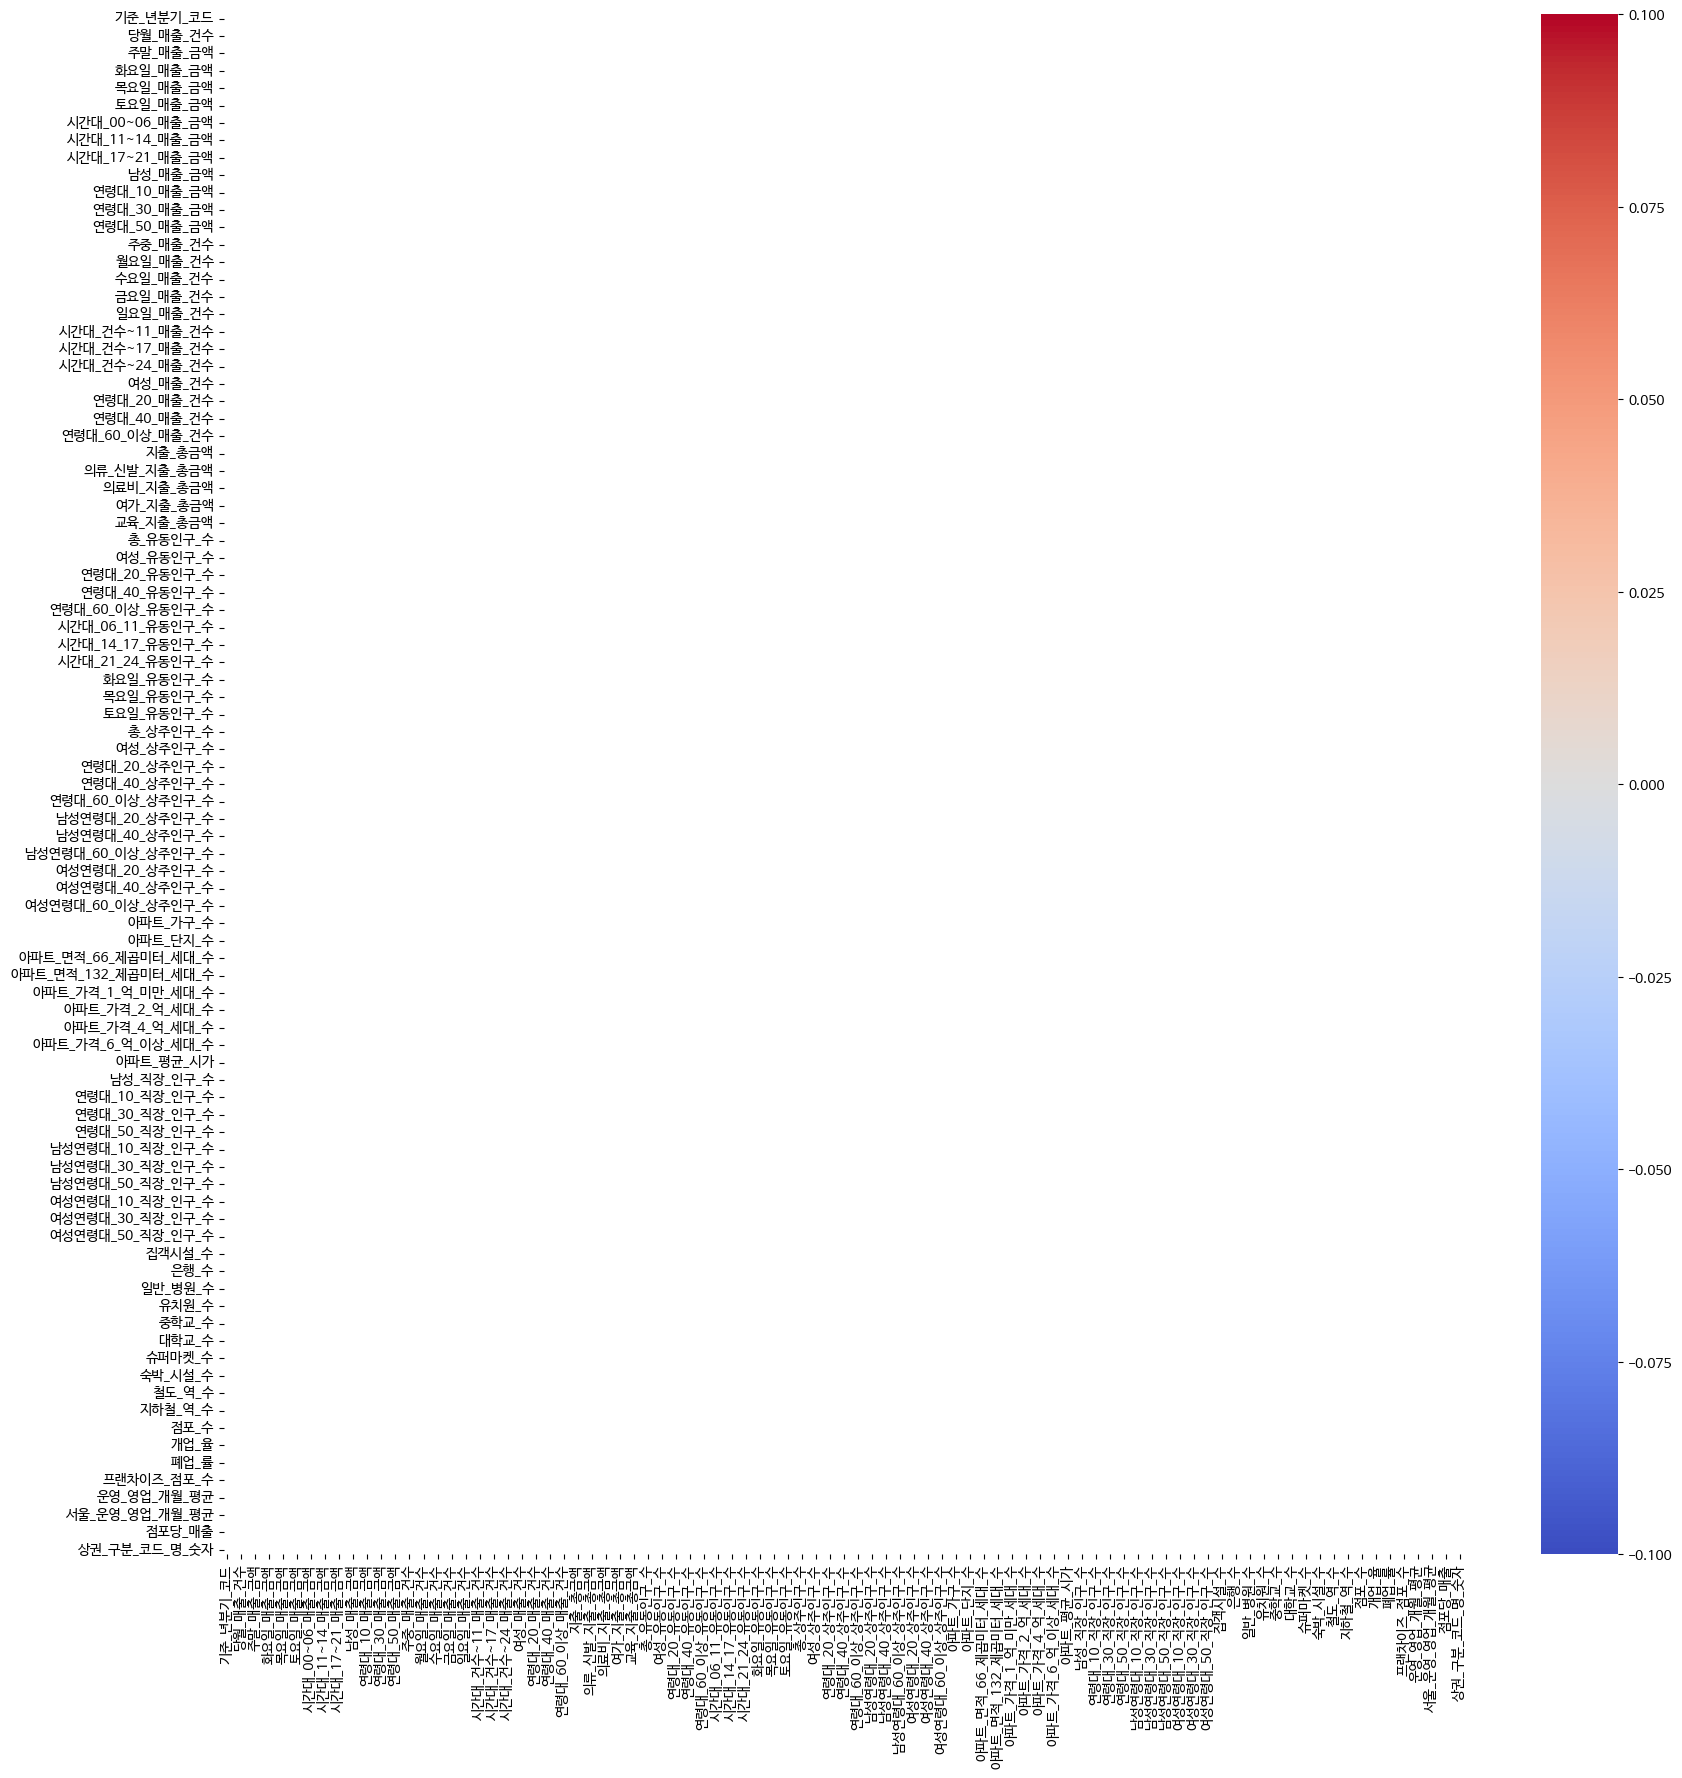

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(corr_df1,
            # annot=True,
            cmap='coolwarm')

In [28]:
features_to_keep = [ '당월_매출_금액',
    '월_평균_소득_금액',
    '지출_총금액',
    '총_유동인구_수',
    '총_가구_수', '아파트_가구_수','아파트_평균_면적', '아파트_평균_시가',
    '총_직장_인구_수',
    '집객시설_수',
    '관공서_수', '은행_수', '종합병원_수', '일반_병원_수', '약국_수', '유치원_수', '초등학교_수', '중학교_수',
    '고등학교_수', '대학교_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '공항_수', '철도_역_수',
    '버스_터미널_수', '지하철_역_수', '버스_정거장_수',
    '점포_수', '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수',
    '운영_영업_개월_평균', '폐업_영업_개월_평균', '서울_운영_영업_개월_평균',
    '서울_폐업_영업_개월_평균', '점포당_매출', '서비스_업종_코드_명_숫자', '상권_구분_코드_명_숫자']
filtered_df = df[features_to_keep]

In [29]:
corr_df = filtered_df.corr()

<Axes: >

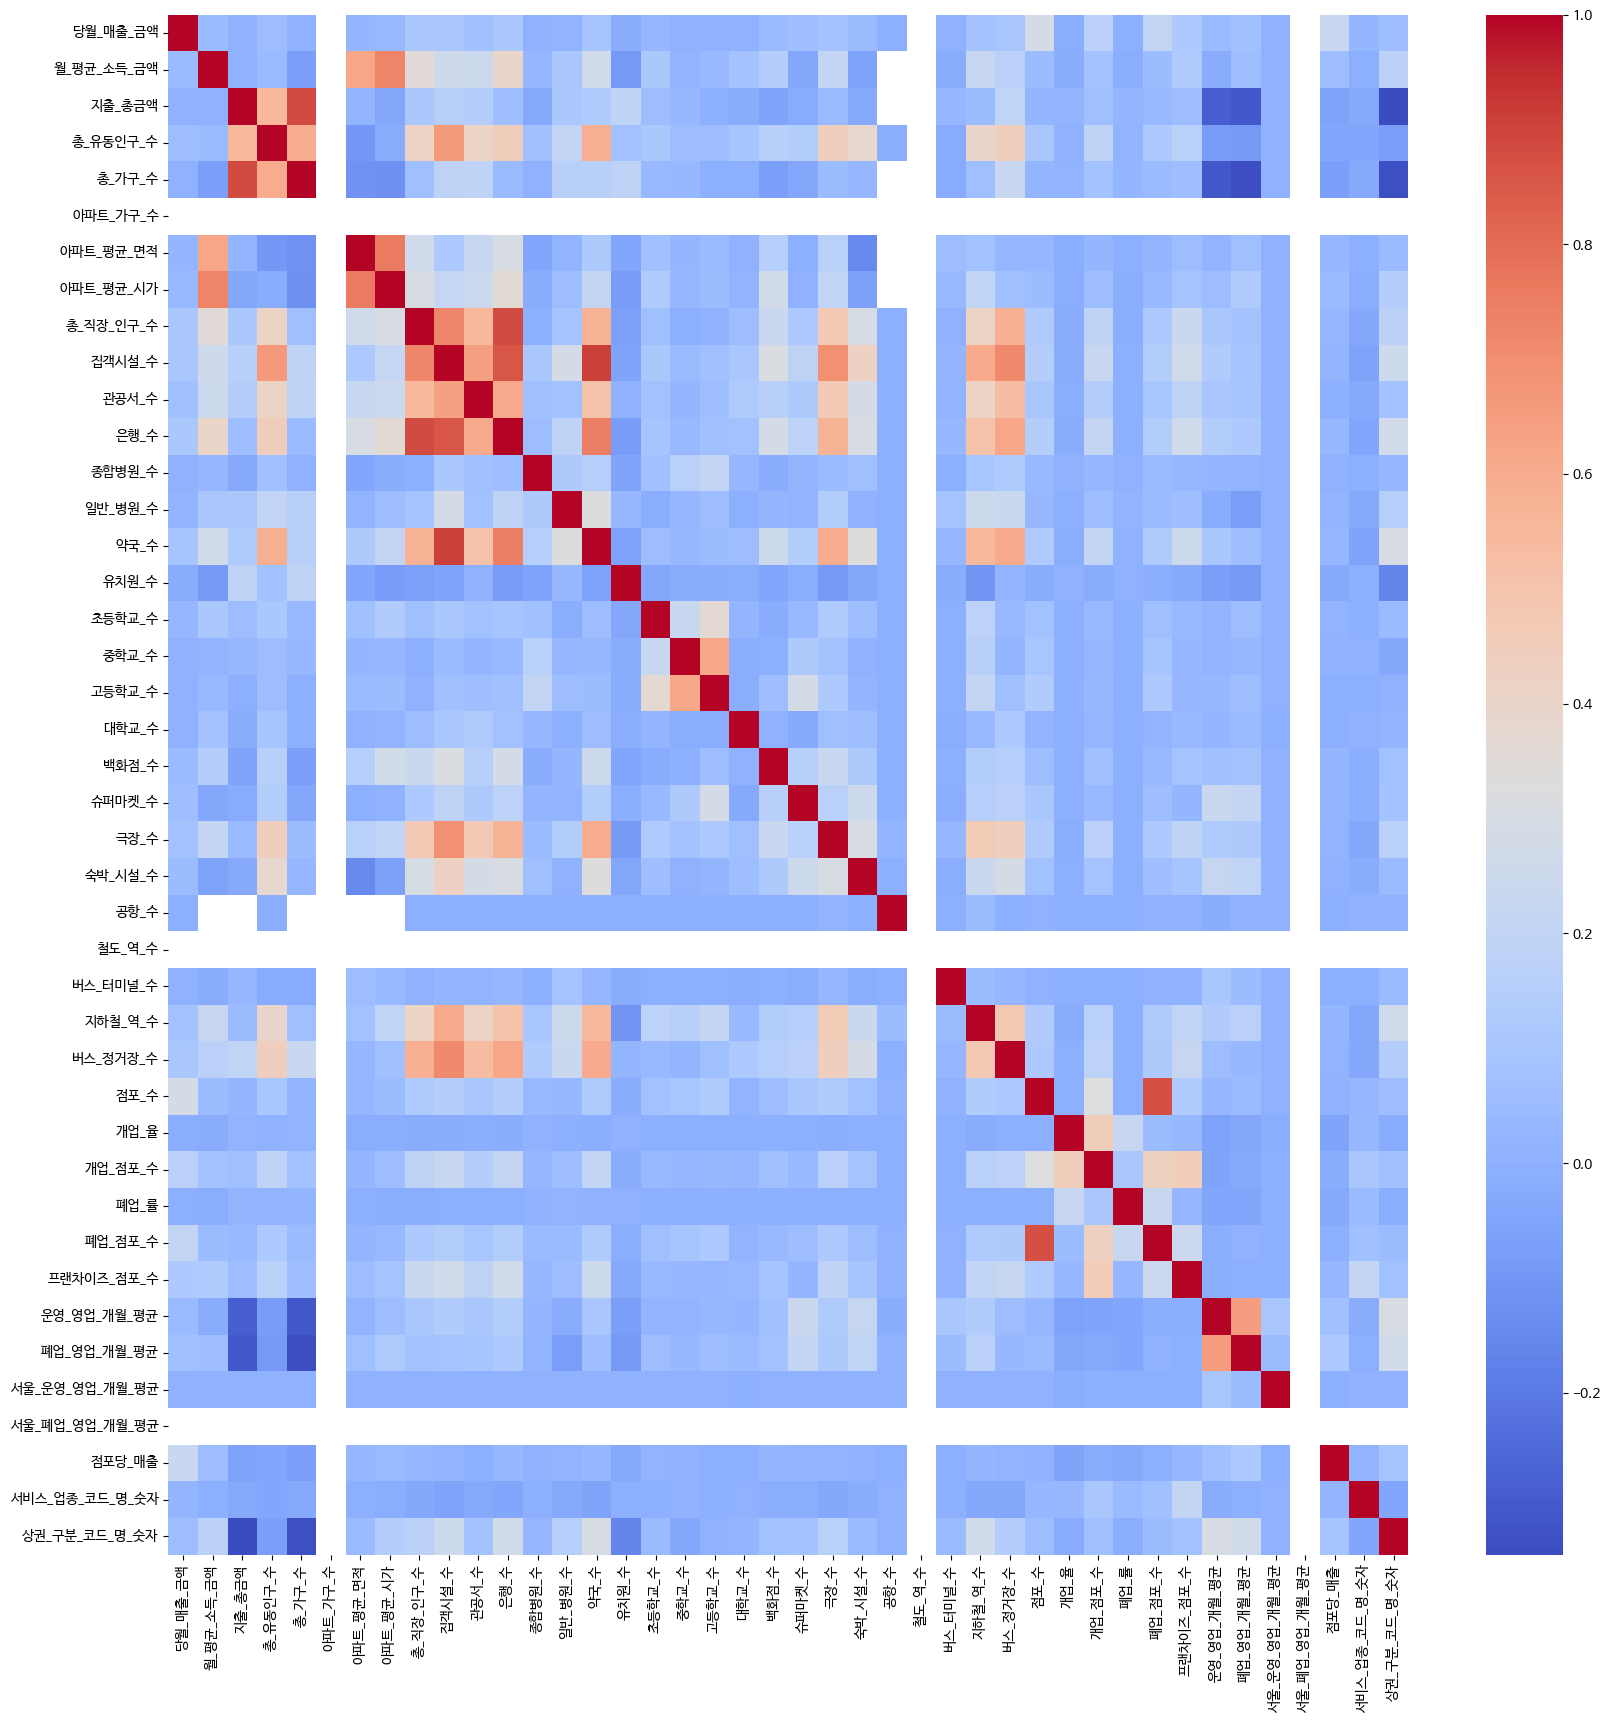

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(corr_df,
            # annot=True,
            cmap='coolwarm')

In [31]:
filtered_df

,당월_매출_금액,월_평균_소득_금액,지출_총금액,총_유동인구_수,총_가구_수,아파트_가구_수,아파트_평균_면적,아파트_평균_시가,총_직장_인구_수,집객시설_수,...,폐업_률,폐업_점포_수,프랜차이즈_점포_수,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균,점포당_매출,서비스_업종_코드_명_숫자,상권_구분_코드_명_숫자
0,405545335,4354652.0,520427635.0,165477.0,401.0,0.0,115.0,435370606.0,1048.0,12.0,...,0,0,2,107,59,104,52,3.686776e+07,57,0
1,117335358,4354652.0,520427635.0,165477.0,401.0,0.0,115.0,435370606.0,1048.0,12.0,...,0,0,0,107,59,104,52,3.911179e+07,15,0
2,19577767,4354652.0,520427635.0,165477.0,401.0,0.0,115.0,435370606.0,1048.0,12.0,...,0,0,1,107,59,104,52,6.525922e+06,60,0
3,47135947,4354652.0,520427635.0,165477.0,401.0,0.0,115.0,435370606.0,1048.0,12.0,...,0,0,0,107,59,104,52,1.571198e+07,37,0
4,452192952,3463885.0,232465205.0,560130.0,343.0,0.0,65.0,325442708.0,475.0,18.0,...,0,0,0,132,62,104,52,6.459899e+07,57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104532,32161424804,7010917.0,NaN,109292.0,18.0,0.0,NaN,NaN,15904.0,35.0,...,0,0,7,128,64,111,52,6.306162e+08,61,1
104533,745477636,7010917.0,NaN,109292.0,18.0,0.0,NaN,NaN,15904.0,35.0,...,0,0,0,128,64,111,52,9.318470e+07,30,1
104534,29974089,7010917.0,NaN,109292.0,18.0,0.0,NaN,NaN,15904.0,35.0,...,0,0,0,128,64,111,52,9.991363e+06,62,1
104535,4527634470,7010917.0,NaN,109292.0,18.0,0.0,NaN,NaN,15904.0,35.0,...,0,0,0,128,64,111,52,7.546057e+08,1,1


In [32]:
filtered_df.isnull().sum()

# [결측치 평균으로]

# 월_평균_소득_금액          2514
# 지출_총금액             28809
# 총_유동인구_수              16
# 총_가구_수             60193
# 아파트_가구_수           60193
# 아파트_평균_면적          86139
# 아파트_평균_시가          86139
# 총_직장_인구_수          40217


# [결측치 0으로 지정]

# 집객시설_수            140506
# 관공서_수             140506
# 은행_수              140506
# 종합병원_수            140506
# 일반_병원_수           140506
# 약국_수              140506
# 유치원_수             140506
# 초등학교_수            140506
# 중학교_수             140506
# 고등학교_수            140506
# 대학교_수             140506
# 백화점_수             140506
# 슈퍼마켓_수            140506
# 극장_수              140506
# 숙박_시설_수           140506
# 공항_수              140506
# 철도_역_수            140506
# 버스_터미널_수          140506
# 지하철_역_수           140506
# 버스_정거장_수          140506

,0
당월_매출_금액,0
월_평균_소득_금액,608
지출_총금액,22302
총_유동인구_수,13
총_가구_수,530
아파트_가구_수,530
아파트_평균_면적,8170
아파트_평균_시가,8170
총_직장_인구_수,277
집객시설_수,805


In [33]:
# 결측치 처리 (1.결측치를 컬럼 평균으로 대체)
# 특정 컬럼명 리스트
columns_to_fill_mean = [
    '월_평균_소득_금액', '지출_총금액', '총_유동인구_수', '총_가구_수',
    '아파트_가구_수', '아파트_평균_면적', '아파트_평균_시가', '총_직장_인구_수'
]

# 결측치 처리: 특정 컬럼은 평균값으로, 나머지는 0으로 대체
filtered_df[columns_to_fill_mean] = filtered_df[columns_to_fill_mean].fillna(filtered_df[columns_to_fill_mean].mean())
filtered_df.fillna(0, inplace=True)

<ipython-input-33-c76cc1a9e945>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[columns_to_fill_mean] = filtered_df[columns_to_fill_mean].fillna(filtered_df[columns_to_fill_mean].mean())
<ipython-input-33-c76cc1a9e945>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.fillna(0, inplace=True)


In [34]:
# 각 컬럼의 결측치 수를 계산
null_counts = filtered_df.isnull().sum()

# 컬럼명과 결측치 수를 출력
for column, null_count in null_counts.items():
    print(f"Column: {column}, Null Count: {null_count}")

Column: 당월_매출_금액, Null Count: 0
Column: 월_평균_소득_금액, Null Count: 0
Column: 지출_총금액, Null Count: 0
Column: 총_유동인구_수, Null Count: 0
Column: 총_가구_수, Null Count: 0
Column: 아파트_가구_수, Null Count: 0
Column: 아파트_평균_면적, Null Count: 0
Column: 아파트_평균_시가, Null Count: 0
Column: 총_직장_인구_수, Null Count: 0
Column: 집객시설_수, Null Count: 0
Column: 관공서_수, Null Count: 0
Column: 은행_수, Null Count: 0
Column: 종합병원_수, Null Count: 0
Column: 일반_병원_수, Null Count: 0
Column: 약국_수, Null Count: 0
Column: 유치원_수, Null Count: 0
Column: 초등학교_수, Null Count: 0
Column: 중학교_수, Null Count: 0
Column: 고등학교_수, Null Count: 0
Column: 대학교_수, Null Count: 0
Column: 백화점_수, Null Count: 0
Column: 슈퍼마켓_수, Null Count: 0
Column: 극장_수, Null Count: 0
Column: 숙박_시설_수, Null Count: 0
Column: 공항_수, Null Count: 0
Column: 철도_역_수, Null Count: 0
Column: 버스_터미널_수, Null Count: 0
Column: 지하철_역_수, Null Count: 0
Column: 버스_정거장_수, Null Count: 0
Column: 점포_수, Null Count: 0
Column: 개업_율, Null Count: 0
Column: 개업_점포_수, Null Count: 0
Column: 폐업_률, Null Count: 0
Co